In [293]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [294]:
import matplotlib.pyplot as plt
from matplotlib import style

In [295]:
import math
import numpy as np

In [296]:
import seaborn as sns

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019,9, 15)


In [299]:
df = web.DataReader("SLB", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-09,36.459999,34.330002,34.500000,36.230000,13461600.0,36.230000
2019-09-10,38.389999,36.830002,37.049999,37.459999,19638200.0,37.459999
2019-09-11,38.830002,37.080002,37.639999,37.320000,17918600.0,37.320000
2019-09-12,37.060001,35.500000,36.529999,36.900002,13089500.0,36.900002
2019-09-13,38.080002,36.799999,37.430000,37.330002,8446100.0,37.330002


In [300]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [301]:
mavg.tail()

Date
2019-09-09    37.108842
2019-09-10    37.023228
2019-09-11    36.954172
2019-09-12    36.878101
2019-09-13    36.805942
Name: Adj Close, dtype: float64

In [302]:
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'3.1.0'

In [303]:
# Adjusting the style of matplotlib
style.use('ggplot')

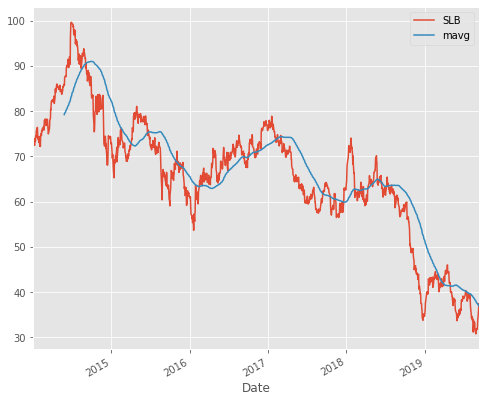

In [304]:
close_px.plot(label='SLB')
mavg.plot(label='mavg')
plt.legend()

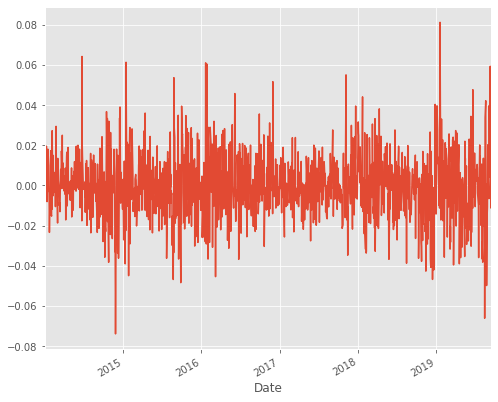

In [305]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [306]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [307]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

In [308]:
dfreg.dropna(inplace=True)

In [309]:
dfreg.head(20)

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2014-01-02,74.428970,4958100.0,1.700070,-0.737599
2014-01-03,74.035133,4212000.0,1.290322,-0.663373
2014-01-06,73.758614,6370100.0,1.840485,-0.967597
2014-01-07,73.331245,6423800.0,1.931211,-0.613289
2014-01-08,72.887108,8527100.0,1.471610,-0.434979
2014-01-09,72.468124,6559200.0,1.850137,-1.188292
2014-01-10,73.884308,8417100.0,2.756040,2.427970
2014-01-13,73.289345,6824000.0,1.429225,-1.063351
2014-01-14,74.470917,5523900.0,1.755370,1.092025


In [310]:
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

In [311]:
from sklearn  import preprocessing

In [312]:
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

In [313]:
X[:4]

array([[ 0.62676069, -0.84919035, -0.42706103, -0.52812603],
       [ 0.59863909, -1.05070912, -0.84157071, -0.47159002],
       [ 0.57889443, -0.46781454, -0.28501393, -0.70330969],
       [ 0.54837856, -0.45331037, -0.19323433, -0.43344231]])

In [314]:
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
#y_test = y[-forecast_out:]

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn  import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [317]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [318]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [319]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [320]:
print(('The linear regression confidence is', confidencereg),
('The quadratic regression 2 confidence is ', confidencepoly2),
('The quadratic regression 3 confidence is ', confidencepoly3),
('The knn regression confidence is ', confidenceknn))

('The linear regression confidence is', 0.9160413083281216) ('The quadratic regression 2 confidence is ', 0.9148474718565889) ('The quadratic regression 3 confidence is ', 0.9017328562991704) ('The knn regression confidence is ', 0.869192686668803)


In [321]:
print(max([confidencereg,confidencepoly2,confidencepoly3,confidenceknn]))

0.9160413083281216


In [322]:
forecast_set_reg = clfreg.predict(X_lately) 
forecast_set_poly2 = clfpoly2.predict(X_lately) 
forecast_set_poly3 = clfpoly3.predict(X_lately) 
forecast_set_knn = clfknn.predict(X_lately) 
dfreg['Forecast'] = np.nan

In [323]:
dfreg.iloc[-1].name

Timestamp('2019-09-13 00:00:00')

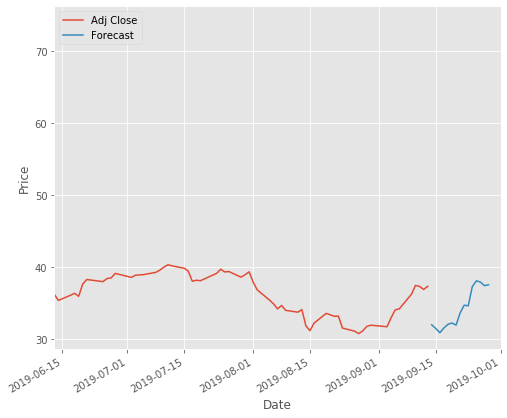

In [324]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_reg:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Price')
plt.xlim(('2019-06-13 00:00:00', '2019-10-01 00:00:00'))
plt.show()